In [51]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from sklearn.datasets import make_blobs
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

C:\Users\wedatalab\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


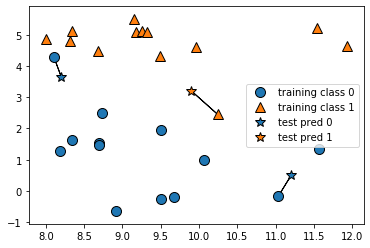

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\wedatalab\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


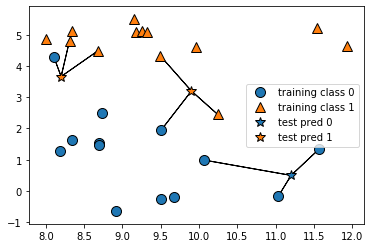

In [39]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [40]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)


C:\Users\wedatalab\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=3)

In [42]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
print('테스트 세트 예측 : {}'.format(clf.predict(X_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [44]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도 : 0.86


# KNeighborsClassifier분석

다음 코드는 이웃이 하나, 셋, 아홉 개일 때의 결정 경계를 보여줍니다.

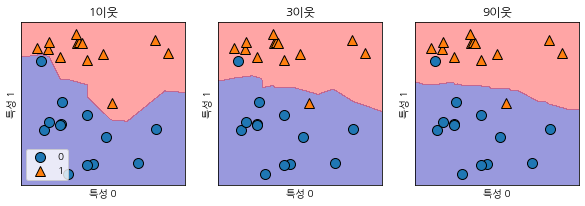

In [52]:
fig, axes = plt.subplots(1,3,figsize=(10,3)) # 평면의 크기조절
for n_neighbors, ax in zip([1,3,9],axes):
    clf= KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

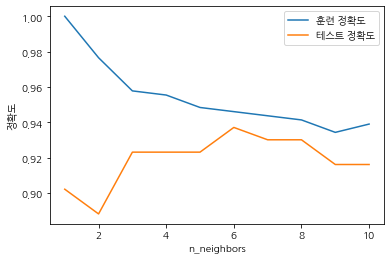

In [58]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

## K-최근접 이웃 회귀

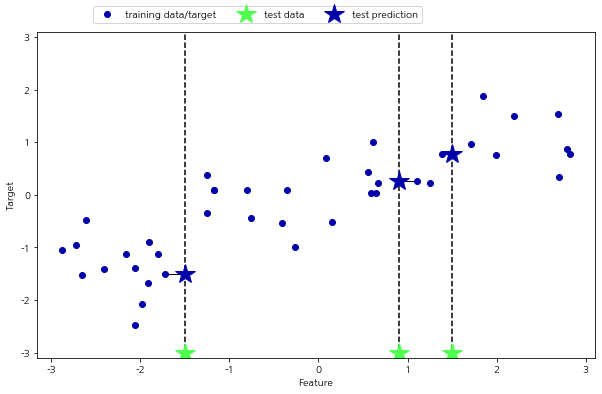

In [60]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

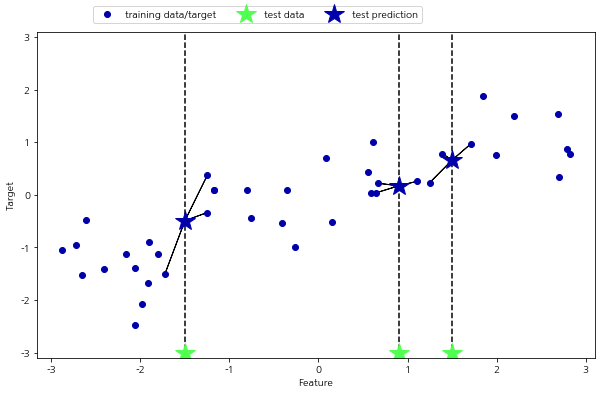

In [61]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [64]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [66]:
print("테스트 세트 예측: \n{}".format(reg.predict(X_test)))

테스트 세트 예측: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [67]:
print("테스트 세트 R^2:\n{}".format(reg.score(X_test,y_test)))

테스트 세트 R^2:
0.8344172446249604


## KNeighborsRegressor 분석

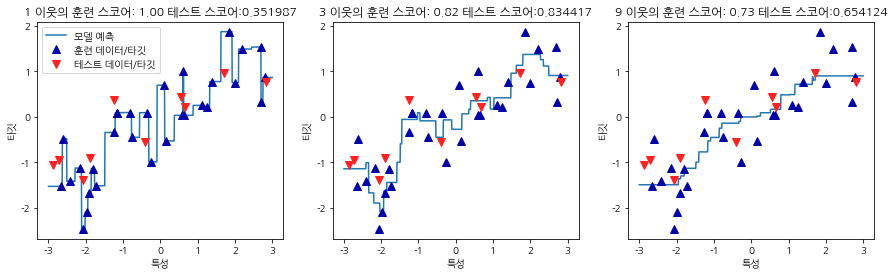

In [73]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test, 'v', c=mglearn.cm2(1),markersize=8)
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어:{:2f}".format(
        n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test,y_test))
    )
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")